# DATA ANALYSIS - IN PROGRESS

 Data downloaded from Kaggle Dataset: https://www.kaggle.com/mchirico/montcoalert

In [2]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\Sylwia\Data Science Projects\911\911.csv', dtype={'zip':str}, parse_dates=[5])

In [4]:
# Understand your data
def data_info(df):
    print('Number of Instances: {}'.format(df.shape[0]))
    print('Number of Features: {}'.format(df.shape[1]))
    print('\nSummary statistics')
    print(df.describe())
    print('\nHow many values are missing?')
    print(df.isna().sum())
    print('\nWhat is the % of missing values?') # To determine if rows with missing values should be dropped or not
    print(round(df.isna().sum()*100/len(df),2))
    print('\nFeatures types')
    print(df.dtypes)

In [5]:
data_info(df)

Number of Instances: 637239
Number of Features: 9

Summary statistics
                 lat            lng         e
count  637239.000000  637239.000000  637239.0
mean       40.158006     -75.301268       1.0
std         0.212923       1.604792       0.0
min         0.000000    -119.698206       1.0
25%        40.100234     -75.392104       1.0
50%        40.143729     -75.304863       1.0
75%        40.229008     -75.211865       1.0
max        51.335390      87.854975       1.0

How many values are missing?
lat              0
lng              0
desc             0
zip          77399
title            0
timeStamp        0
twp            273
addr             0
e                0
dtype: int64

What is the % of missing values?
lat           0.00
lng           0.00
desc          0.00
zip          12.15
title         0.00
timeStamp     0.00
twp           0.04
addr          0.00
e             0.00
dtype: float64

Features types
lat                 float64
lng                 float64
desc      

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
columns = ['Latitude', 'Longitude', 'Emergency Description', 'ZIP Code', 
           'Emergency Title', 'Date and time', 'Township', 'General Address', 'Index column, always 1']

In [9]:
df.columns = columns

In [10]:
df.drop(['Index column, always 1'], axis=1, inplace=True)

In [11]:
#Create a new column with a Emergency Category
df['Emergency category'] = df['Emergency Title'].str.split(':', n=1, expand = True)[0]

In [12]:
df['Emergency Title'] = df['Emergency Title'].str.split(':', n=1, expand = True)[1]

In [13]:
# CHANGING OBJECT TYPES
df['Emergency Description'] = df['Emergency Description'].astype(str)
df['Emergency Title'] = df['Emergency Title'].astype('category')
df['Emergency category'] = df['Emergency category'].astype('category')

In [14]:
df['Emergency Title'] = df['Emergency Title'].str.split('-', n=1, expand=True)[0]

In [15]:
df[df.isnull().any(axis=1)]

,Latitude,Longitude,Emergency Description,ZIP Code,Emergency Title,Date and time,Township,General Address,Emergency category
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,VEHICLE ACCIDENT,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,Traffic
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,VEHICLE ACCIDENT,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,Traffic
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,DISABLED VEHICLE,2015-12-10 18:00:38,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,Traffic
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,VEHICLE ACCIDENT,2015-12-10 17:58:22,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,Traffic
28,40.097222,-75.376195,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,NaN,VEHICLE ACCIDENT,2015-12-10 18:05:39,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,Traffic
30,40.097222,-75.376195,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,NaN,VEHICLE ACCIDENT,2015-12-10 18:07:01,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,Traffic
34,40.221227,-75.288737,MORRIS RD & MUHLENBURG DR; UPPER GWYNEDD; 2015...,NaN,DISABLED VEHICLE,2015-12-10 18:23:13,UPPER GWYNEDD,MORRIS RD & MUHLENBURG DR,Traffic
37,40.066718,-75.307176,CONSHOHOCKEN STATE RD; WEST CONSHOHOCKEN; Sta...,NaN,VEHICLE ACCIDENT,2015-12-10 18:29:54,WEST CONSHOHOCKEN,CONSHOHOCKEN STATE RD,EMS
42,40.024967,-75.282905,ROSEMONT AVE & DEAD END; LOWER MERION; Statio...,NaN,CARDIAC EMERGENCY,2015-12-10 18:43:07,LOWER MERION,ROSEMONT AVE & DEAD END,EMS


In [16]:
df['Emergency Title'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS',
       ' CARDIAC EMERGENCY', ' DIZZINESS', ' HEAD INJURY',
       ' NAUSEA/VOMITING', ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT ', ' VEHICLE ACCIDENT', ' DISABLED VEHICLE ',
       ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' ALTERED MENTAL STATUS', ' FIRE ALARM',
       ' CVA/STROKE', ' ROAD OBSTRUCTION ', ' SUBJECT IN PAIN',
       ' HEMORRHAGING', ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY ', ' FEVER', ' ALLERGIC REACTION',
       ' VEHICLE LEAKING F

In [17]:
df['Emergency category'].unique()

[EMS, Fire, Traffic]
Categories (3, object): [EMS, Fire, Traffic]

In [19]:
# CHECKING ZIP CODES
df['ZIP Code'].unique()

array(['19525', '19446', '19401', nan, '19044', '19426', '19438', '19462',
       '19428', '19040', '19027', '18936', '18974', '19031', '19403',
       '19422', '19085', '18964', '19038', '19406', '19468', '19010',
       '19095', '19464', '19444', '19041', '19440', '19405', '19002',
       '19096', '19454', '19465', '19004', '19066', '19072', '18041',
       '19046', '19090', '19012', '19025', '19473', '18073', '18969',
       '18074', '19460', '19001', '18054', '19009', '19006', '19035',
       '19150', '19075', '19034', '19151', '19453', '19003', '18914',
       '19512', '18976', '19120', '18915', '18076', '19477', '19087',
       '18966', '19131', '19128', '19083', '19053', '19475', '18960',
       '19504', '18070', '19492', '18932', '19118', '18092', '19490',
       '19518', '18056', '19119', '19107', '17752', '19111', '18927',
       '19435', '18951', '19472', '19503', '19126', '19505', '19423',
       '19138', '36107', '18036', '19116', '19139', '19129', '19115',
       '19355',

In [20]:
# From above set of ZIP Codes I spotted ZIP Codes with less then 5 numbers. 
# Below it's a check of ZIP Codes with higher then 5 or less than 5 lenght.
df[(df['ZIP Code'].str.len() < 5) | (df['ZIP Code'].str.len() > 5)]

,Latitude,Longitude,Emergency Description,ZIP Code,Emergency Title,Date and time,Township,General Address,Emergency category
366964,40.123470,-75.336233,ROSE ; TRAPPE; 2018-07-03 @ 18:53:26;,3366,ROAD OBSTRUCTION,2018-07-03 18:53:26,TRAPPE,ROSE,Traffic
425866,40.229008,-75.387853,SPROUL RD & DEEPDENE RD; DELAWARE COUNTY; 2018...,3103,FIRE ALARM,2018-11-21 10:00:06,DELAWARE COUNTY,SPROUL RD & DEEPDENE RD,Fire
460797,40.229008,-75.387853,SPROUL RD & DEEPDENE RD; DELAWARE COUNTY; 2019...,3103,FIRE ALARM,2019-02-15 17:31:47,DELAWARE COUNTY,SPROUL RD & DEEPDENE RD,Fire


In [21]:
df[df['Township'] == 'TRAPPE'] # How the correct ZIP Codes for this places should look like?

,Latitude,Longitude,Emergency Description,ZIP Code,Emergency Title,Date and time,Township,General Address,Emergency category
1516,40.194647,-75.466064,MAIN ST & E 1ST AVE; TRAPPE; Station 324; 201...,19426,CVA/STROKE,2015-12-14 16:59:13,TRAPPE,MAIN ST & E 1ST AVE,EMS
3681,40.200754,-75.482719,HOLLY DR & ASH ST; TRAPPE; Station 324; 2015-...,19426,GENERAL WEAKNESS,2015-12-20 18:30:44,TRAPPE,HOLLY DR & ASH ST,EMS
3801,40.199028,-75.476592,MAIN ST & W 5TH AVE; TRAPPE; Station 324; 201...,19426,SEIZURES,2015-12-21 06:55:09,TRAPPE,MAIN ST & W 5TH AVE,EMS
4415,40.187913,-75.479740,W 3RD AVE & BORO LINE RD; TRAPPE; 2015-12-22 @...,19426,VEHICLE ACCIDENT,2015-12-22 14:58:13,TRAPPE,W 3RD AVE & BORO LINE RD,Traffic
4420,40.192513,-75.475190,W 3RD AVE; TRAPPE; 2015-12-22 @ 15:15:06-Stati...,19426,VEHICLE ACCIDENT,2015-12-22 15:15:06,TRAPPE,W 3RD AVE,Fire
4430,40.189420,-75.478256,3RD AVE & BRONSON CIR; TRAPPE; 2015-12-22 @ 15...,19426,VEHICLE ACCIDENT,2015-12-22 15:15:06,TRAPPE,3RD AVE & BRONSON CIR,Fire
4453,40.198900,-75.476282,W MAIN ST; TRAPPE; 2015-12-22 @ 16:40:36-Stati...,19426,VEHICLE ACCIDENT,2015-12-22 16:40:36,TRAPPE,W MAIN ST,Fire
4454,40.198900,-75.476282,W MAIN ST; TRAPPE; Station 324; 2015-12-22 @ ...,19426,VEHICLE ACCIDENT,2015-12-22 16:40:46,TRAPPE,W MAIN ST,EMS
4458,40.199028,-75.476592,W MAIN ST & W 5TH AVE; TRAPPE; 2015-12-22 @ 16...,19426,VEHICLE ACCIDENT,2015-12-22 16:41:02,TRAPPE,W MAIN ST & W 5TH AVE,Traffic
4678,40.194556,-75.478955,FRANKLIN CT & WILLIAMS WAY; TRAPPE; Station 3...,19426,CARDIAC EMERGENCY,2015-12-23 07:58:41,TRAPPE,FRANKLIN CT & WILLIAMS WAY,EMS


In [22]:
df[df['Township'] == 'DELAWARE COUNTY']

,Latitude,Longitude,Emergency Description,ZIP Code,Emergency Title,Date and time,Township,General Address,Emergency category
27,40.028903,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085,CARBON MONOXIDE DETECTOR,2015-12-10 18:05:19,DELAWARE COUNTY,EDENTON PL & DURHAM DR,Fire
458,40.036005,-75.349197,LANCASTER AVE & N SPRING MILL RD; DELAWARE COU...,19085,FIRE ALARM,2015-12-11 19:56:34,DELAWARE COUNTY,LANCASTER AVE & N SPRING MILL RD,Fire
513,40.020019,-75.334040,ROBERTS RD & CASTLEFINN LN; DELAWARE COUNTY; ...,19010,CARDIAC EMERGENCY,2015-12-12 01:09:57,DELAWARE COUNTY,ROBERTS RD & CASTLEFINN LN,EMS
1030,40.036005,-75.349197,LANCASTER AVE & N SPRING MILL RD; DELAWARE COU...,19085,BUILDING FIRE,2015-12-13 12:22:13,DELAWARE COUNTY,LANCASTER AVE & N SPRING MILL RD,Fire
1229,39.992440,-75.301414,EAGLE RD & POPLAR RD; DELAWARE COUNTY; Statio...,19083,UNCONSCIOUS SUBJECT,2015-12-14 01:06:34,DELAWARE COUNTY,EAGLE RD & POPLAR RD,EMS
1594,40.007333,-75.352171,COUNTRYVIEW DR & BRYN MAWR AVE; DELAWARE COUNT...,19010,FIRE ALARM,2015-12-14 19:25:33,DELAWARE COUNTY,COUNTRYVIEW DR & BRYN MAWR AVE,Fire
1713,40.021969,-75.329516,DAVID DR & S ROBERTS RD; DELAWARE COUNTY; 2015...,19010,CARBON MONOXIDE DETECTOR,2015-12-15 07:29:52,DELAWARE COUNTY,DAVID DR & S ROBERTS RD,Fire
2700,40.017677,-75.339394,S ROBERTS RD; DELAWARE COUNTY; 2015-12-17 @ 16...,19010,GAS,2015-12-17 16:04:07,DELAWARE COUNTY,S ROBERTS RD,Fire
2819,40.018004,-75.311304,W LANCASTER AVE & PENNSWOOD RD; DELAWARE COUNT...,19010,VEHICLE ACCIDENT,2015-12-17 20:44:53,DELAWARE COUNTY,W LANCASTER AVE & PENNSWOOD RD,Traffic
2826,40.229008,-75.387853,E DEKALB PIKE & MONROE BLVD; DELAWARE COUNTY; ...,NaN,VEHICLE ACCIDENT,2015-12-17 20:39:26,DELAWARE COUNTY,E DEKALB PIKE & MONROE BLVD,Traffic


In [22]:
df.set_index('Date and time')

,Latitude,Longitude,Emergency Description,ZIP Code,Emergency Title,Township,General Address,Emergency category
Date and time,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,GAS,NORRISTOWN,HAWS AVE,Fire
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,EMS
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,EMS
2015-12-10 16:46:48,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044,NAUSEA/VOMITING,HORSHAM,LAUREL AVE & OAKDALE AVE,EMS
2015-12-10 16:17:05,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426,RESPIRATORY EMERGENCY,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,EMS
2015-12-10 16:51:42,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438,SYNCOPAL EPISODE,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,EMS


In [23]:
df.groupby('Emergency category')['Emergency category'].count()

Emergency category
EMS        318806
Fire        95678
Traffic    222755
Name: Emergency category, dtype: int64

In [28]:
df['Count'] = df['Emergency category'].count()

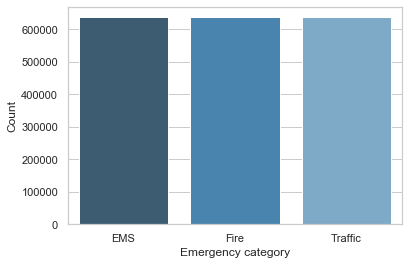

In [34]:
sns.set(style='whitegrid')
ax=sns.barplot(x='Emergency category', y='Count', data=df, palette='Blues_d')